Reference: https://zhuanlan.zhihu.com/p/114980874

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
from torch.autograd import Variable

In [15]:
x = torch.unsqueeze(torch.linspace(-1,1,100),dim=1) #same as .unsqueeze(1)
print(x.shape)
y = x.pow(3)+0.1*torch.randn(x.size())
y.shape

torch.Size([100, 1])


torch.Size([100, 1])

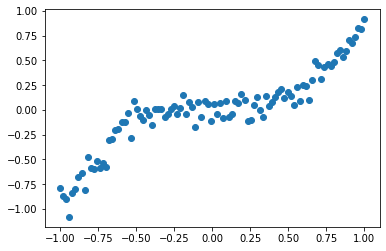

In [16]:
x , y =(Variable(x),Variable(y))
plt.scatter(x.data,y.data)
# also same as:
# plt.scatter(x.data.numpy(),y.data.numpy())
plt.show()

Formwork of pytorch NN
```
class Net(nn.Module):
    def __init__(self):
        super(self).__init__()
        pass
    def forward(self):
        pass
```

In [20]:
class Net(nn.Module):
    def __init__(self,n_input,n_hidden,n_output):#input output demension, and number of hidden unit
        super(Net,self).__init__()
        self.hidden1 = nn.Linear(n_input,n_hidden)
        self.hidden2 = nn.Linear(n_hidden,n_hidden)
        self.predict = nn.Linear(n_hidden,n_output)
    def forward(self,input):
        out = self.hidden1(input)
        out = F.relu(out)
        out = self.hidden2(out)
        out = F.relu(out)
        out =self.predict(out)

        return out

In [21]:
net = Net(1,20,1)
print(net)

Net(
  (hidden1): Linear(in_features=1, out_features=20, bias=True)
  (hidden2): Linear(in_features=20, out_features=20, bias=True)
  (predict): Linear(in_features=20, out_features=1, bias=True)
)


In [22]:
optimizer = torch.optim.SGD(net.parameters(),lr = 0.01)
loss_func = torch.nn.MSELoss()

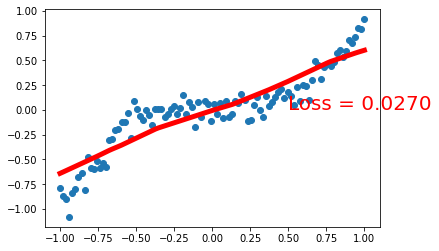

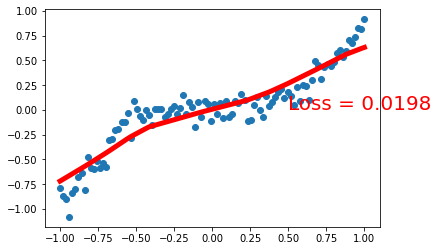

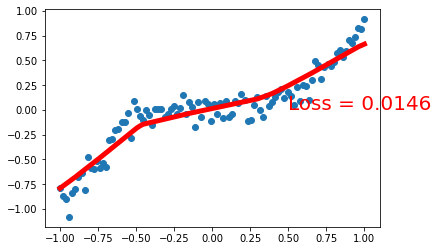

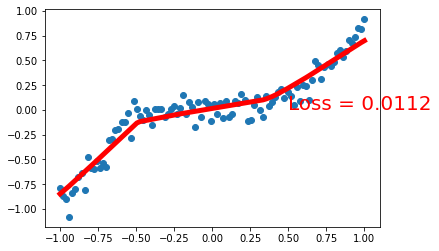

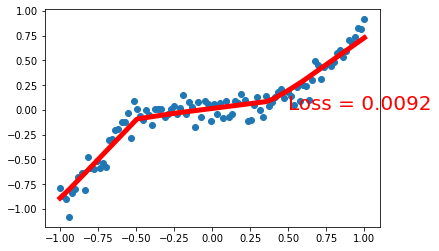

In [24]:
for t in range(5000):
    prediction = net(x)
    loss = loss_func(prediction,y)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if t%1000 ==0:
        plt.cla()
        plt.scatter(x.data.numpy(), y.data.numpy())
        plt.plot(x.data.numpy(), prediction.data.numpy(), 'r-', lw=5)
        plt.text(0.5, 0, 'Loss = %.4f' % loss.data, fontdict={'size': 20, 'color': 'red'})
        plt.pause(0.05)

plt.ioff()
plt.show()